# Analysis of Diseases & Symptoms

---

## Importing data

In [69]:
import pandas as pd
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
df = pd.read_csv('/Users/cameronpeterson/Documents/Sorting folder/Disease_symptom_and_patient_profile_dataset.csv')

---

## Initial Assessment

In [70]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [71]:
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

We can see from the initial analysis that our data is categorical aside from age. This might need to be adjusted later on regarding data visualization. 

Since we're trying to assess information about the diseases, and each row is a representation of a sample, we need to assess which diseases have adequate sample sizes in order to gather accurate data.

---

## Data Cleaning

In [72]:
print(sum(df.Disease.value_counts() > 9))
print(sum(df.Disease.value_counts() <= 9))

6
110


It appears that there are 6 diseases with 10 or more samples. Let's reduce the number of classes to make our dataset more managable and likely more accurate. 

In [73]:
df = df[df.groupby('Disease')['Disease'].transform('size') >= 10]
print(df)

      Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
3      Asthma   Yes   Yes      No                  Yes   25    Male   
4      Asthma   Yes   Yes      No                  Yes   25    Male   
10     Asthma   Yes    No      No                  Yes   28    Male   
14   Diabetes    No    No      No                   No   29    Male   
20     Stroke   Yes   Yes     Yes                  Yes   29  Female   
..        ...   ...   ...     ...                  ...  ...     ...   
344    Stroke   Yes    No     Yes                   No   80  Female   
345    Stroke   Yes    No     Yes                   No   85    Male   
346    Stroke   Yes    No     Yes                   No   85    Male   
347    Stroke   Yes    No     Yes                   No   90  Female   
348    Stroke   Yes    No     Yes                   No   90  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
3           Normal            Normal         Positive  
4           Normal            Norma

In [74]:
print(sum(df.Disease.value_counts() > 9))
print(sum(df.Disease.value_counts() <= 9))

6
0


In [75]:
df.shape

(83, 10)

Now let's check for missing code. For this data set, that will include **missing values** and **duplicates**. 

In [76]:
df.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

No missing values

In [77]:
df.duplicated().sum()

14

It looks like we have a few duplicates. Let's drop those. 

In [78]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

---

## Data Analysis

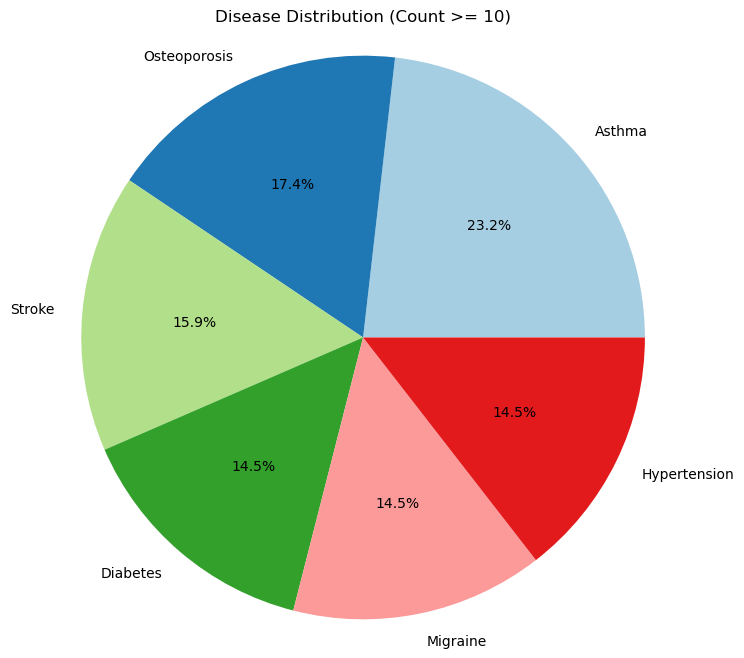

In [79]:
grouped_diseases = df['Disease'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grouped_diseases, labels=grouped_diseases.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Disease Distribution (Count >= 10)')
plt.axis('equal')
plt.show()

Our classes are imbalanced. We will need to keep this in mind when assessing future data. Some things to keep in mind are that Asthma and Osteoperosis both have a much higher sample rate. Additionally, Stroke, Diabetes, Migrane, and Hypertension have similar sample rates with one another. 

We need to process categorical variables to allow us to assess each variable independantly. 

In [80]:
dictionary = {'Yes':1, 'No':0, 'Low':1, 'Normal':2, 'High':3, 'Positive':1, 'Negative':0, 'Male':0, 'Female':1}
def replace(x, dictionary = dictionary):
    if x in dictionary:
        x= dictionary[x]
    return x
df = df.applymap(replace)

In [81]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Asthma,1,1,0,1,25,0,2,2,1
1,Asthma,1,0,0,1,28,0,3,2,1
2,Diabetes,0,0,0,0,29,0,1,2,0
3,Stroke,1,1,1,1,29,1,2,2,1
4,Migraine,1,0,0,0,30,1,2,2,0


In [82]:
df.dtypes

Disease                 object
Fever                    int64
Cough                    int64
Fatigue                  int64
Difficulty Breathing     int64
Age                      int64
Gender                   int64
Blood Pressure           int64
Cholesterol Level        int64
Outcome Variable         int64
dtype: object

We have converted our data into numerical format. This will allow us to perform a our analysis on each variable individually. 

Let's begin with the Age variable.

In [83]:
fig = px.histogram(
            df, 
            x = 'Age',  
            title='Age-Disease Histogram',
            color= 'Disease'
                  )
fig.update_layout(bargap=0.2)

fig.show()

A few things to note here:

1. Asthma is most prevelant between ages of 30-40 and 40-50. 
2. Migraine and Hypertension are not present between the ages of 20-30. 
3. 80+ age groups only have a stroke reported as the disease. This suggests that this higher age group has a higher risk of stroke. 
4. Diabetes, Osteoporosis, and Hypertension seem to increase with age.

In [84]:
def subplots(df, columns):
    fig = sp.make_subplots(rows=2, cols=2, subplot_titles=columns)

    for idx, column in enumerate(columns):
        i = idx // 2 + 1 
        j = idx % 2 + 1  
        fig_express = px.histogram(df, x=column, title=column + '-Disease Distribution', color='Disease')
        for trace in fig_express.data:
            fig.add_trace(trace, row=i, col=j)

    fig.update_layout(showlegend=False)    
    fig.update_layout(height=600, width=800, title_text="")
    fig.show()

subplots(df, df.columns[1:5])


In [85]:
subplots(df, df.columns[6:])

A couple of things to note from this analysis: 
1. Someone **without** difficulty breathing likely **does not** have Asthma. Likewise, someone **with** difficulty breathing likely **does** have Asthma.
2. Someone with low blood pressure does not have a stroke. This effects stroke prediction. 
3. Things like a fever and a cough are likely to appear with Asthma. Additionally, aomeone with Asthma is most likely to have mid-level Cholestorol and Blood Pressure. 
4. Difficulty breathing doesn't seem to be highly present in those with diabetes or a stroke. 
5. Higher Cholestorol and Blood Pressure seem to play a factor in Osteoporosis.

An important thing to remember is that our Asthma sample size was much larger than the other diseases. This is why Asthma's bar is much larger in each respective category.

Let's take a look at what values exist across the board regarding symptoms. 

In [87]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

df.columns = df.columns.astype(str)

fig = make_subplots(rows=2, cols=4, subplot_titles=cols, vertical_spacing=0.2, horizontal_spacing=0.1)

for i, col_name in enumerate(cols):
    fig.add_trace(go.Bar(x=df[col_name].value_counts().index,
                         y=df[col_name].value_counts().values,
                         name=col_name),
                  row=i // 4 + 1, col=i % 4 + 1)

    # Update x-axis tick labels to the actual values represented in the subplot
    fig.update_xaxes(row=i // 4 + 1, col=i % 4 + 1,
                     tickvals=df[col_name].unique(), ticktext=df[col_name].unique())

fig.update_layout(title_text='Histplot of Objective Value', title_font_size=20,
                  height=600, width=1000, showlegend=False)

fig.show()


Right away we can see a few things:
1. Our gender category is pretty balanced, so our data will likely be accurate in regards to gender. 
2. We can also see that things like high blood pressure and cholesterol are large factors in diseases across the board.
3. Difficulty breathing is not very present amongst our disease sample group